IMPORTS, OPTIONS SETTING & DATA READING.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df= pd.read_csv('IMDb_Dataset_2.csv')
df_copy= df.copy()
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


DATA PREPROCESSING

In [3]:
print('The shape of the dataframe is: ')
df.shape

The shape of the dataframe is: 


(3173, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3173 non-null   object 
 1   IMDb Rating         3173 non-null   float64
 2   Year                3173 non-null   int64  
 3   Certificates        3173 non-null   object 
 4   Genre               3173 non-null   object 
 5   Director            3173 non-null   object 
 6   Star Cast           3173 non-null   object 
 7   MetaScore           3173 non-null   float64
 8   Poster-src          3173 non-null   object 
 9   Duration (minutes)  3173 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 248.0+ KB


In [5]:
print('Number of DUPLICATE values: ')
df.duplicated().sum()

Number of DUPLICATE values: 


411

In [6]:
df= df.drop_duplicates()
df_copy= df_copy.drop_duplicates()
print('All the duplicates have been remvoed.')

All the duplicates have been remvoed.


In [7]:
print('The new shape of the dataframe is: ')
df.shape

The new shape of the dataframe is: 


(2762, 10)

In [8]:
print('Number of NULL values per column: ')
df.isnull().sum()

Number of NULL values per column: 


Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Poster-src            0
Duration (minutes)    0
dtype: int64

FEATURE ENGINEERING

In [9]:
for i in df['Certificates'].unique():
    print(i)

PG-13
PG
R
G
NC-17
Approved
M/PG
TV-MA
Not Rated
Unrated
TV-PG
TV-Y7
TV-14
X
Passed
TV-G


In [10]:
for i in df['Genre'].unique():
    print(i)

Adventure
Biography
Documentary
Action
Animation
Drama
Crime
Comedy
Family
Horror
Fantasy
Sci-Fi
Musical
Mystery
Romance
History
Reality-TV


In [11]:
to_drop= ['Title', 'Director', 'Star Cast', 'Poster-src']
outlier_detection= ['IMDb Rating', 'Year', 'MetaScore', 'Duration (minutes)']
label_encoding= ['Certificates', 'Genre']

In [12]:
df.drop(to_drop, axis= 1, inplace= True)
print('The necessary columns have been dropped.')

The necessary columns have been dropped.


In [13]:
print('The new shape of the dataframe is: ')
df.shape

The new shape of the dataframe is: 


(2762, 6)

DATA VISUALIZATIONS

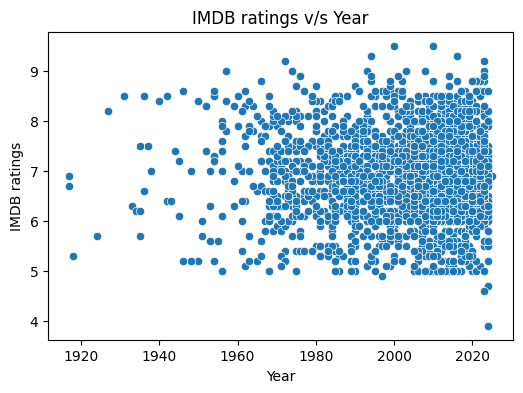

In [14]:
plt.figure(figsize= (6, 4))
sns.scatterplot(data= df, x= 'Year', y= 'IMDb Rating')
plt.title('IMDB ratings v/s Year')
plt.xlabel('Year')
plt.ylabel('IMDB ratings')
plt.show()

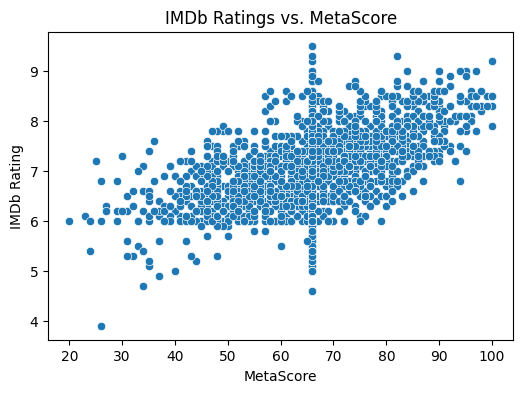

In [15]:
plt.figure(figsize= (6, 4))
sns.scatterplot(data=df, x='MetaScore', y='IMDb Rating')
plt.title('IMDb Ratings vs. MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')
plt.show()

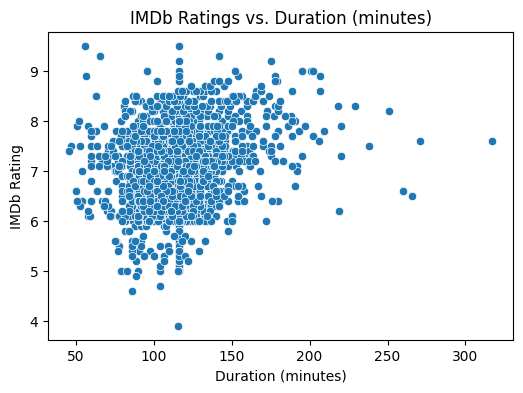

In [16]:
plt.figure(figsize= (6, 4))
sns.scatterplot(data=df, x='Duration (minutes)', y='IMDb Rating')
plt.title('IMDb Ratings vs. Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

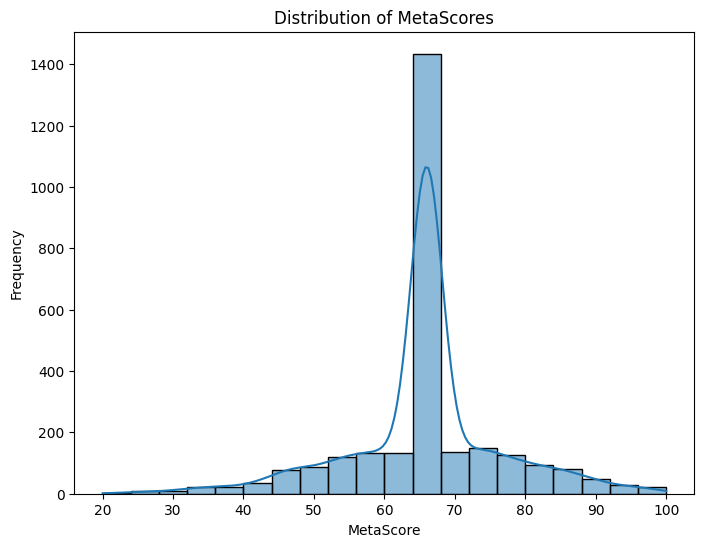

In [17]:
plt.figure(figsize= (8, 6))
sns.histplot(df['MetaScore'], bins=20, kde=True)
plt.title('Distribution of MetaScores')
plt.xlabel('MetaScore')
plt.ylabel('Frequency')
plt.show()

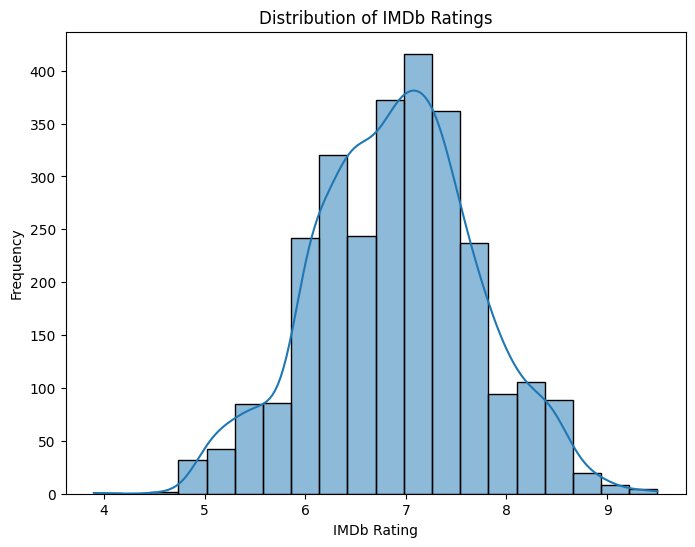

In [18]:
plt.figure(figsize= (8, 6))
sns.histplot(df['IMDb Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

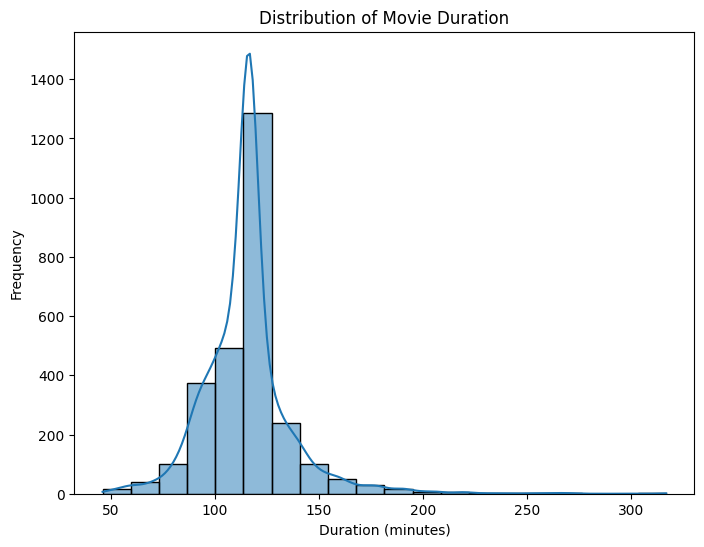

In [19]:
plt.figure(figsize= (8, 6))
sns.histplot(df['Duration (minutes)'], bins=20, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

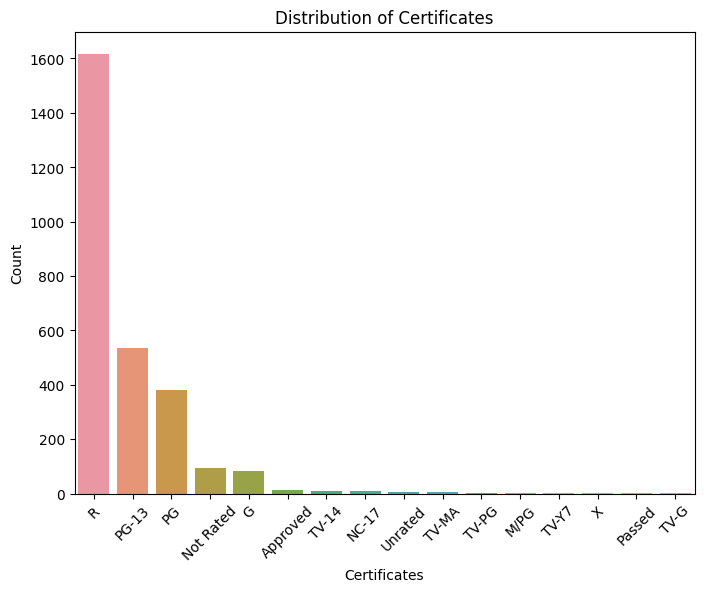

In [20]:
plt.figure(figsize= (8, 6))
sns.countplot(data=df_copy, x='Certificates', order=df_copy['Certificates'].value_counts().index)
plt.title('Distribution of Certificates')
plt.xlabel('Certificates')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

LABEL ENCODING

In [21]:
label_encoding

['Certificates', 'Genre']

In [22]:
df['Certificates']= LabelEncoder().fit_transform(df['Certificates'])
df['Genre']= LabelEncoder().fit_transform(df['Genre'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2762 entries, 0 to 3172
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IMDb Rating         2762 non-null   float64
 1   Year                2762 non-null   int64  
 2   Certificates        2762 non-null   int32  
 3   Genre               2762 non-null   int32  
 4   MetaScore           2762 non-null   float64
 5   Duration (minutes)  2762 non-null   float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 129.5 KB


OUTLIER DETECTION

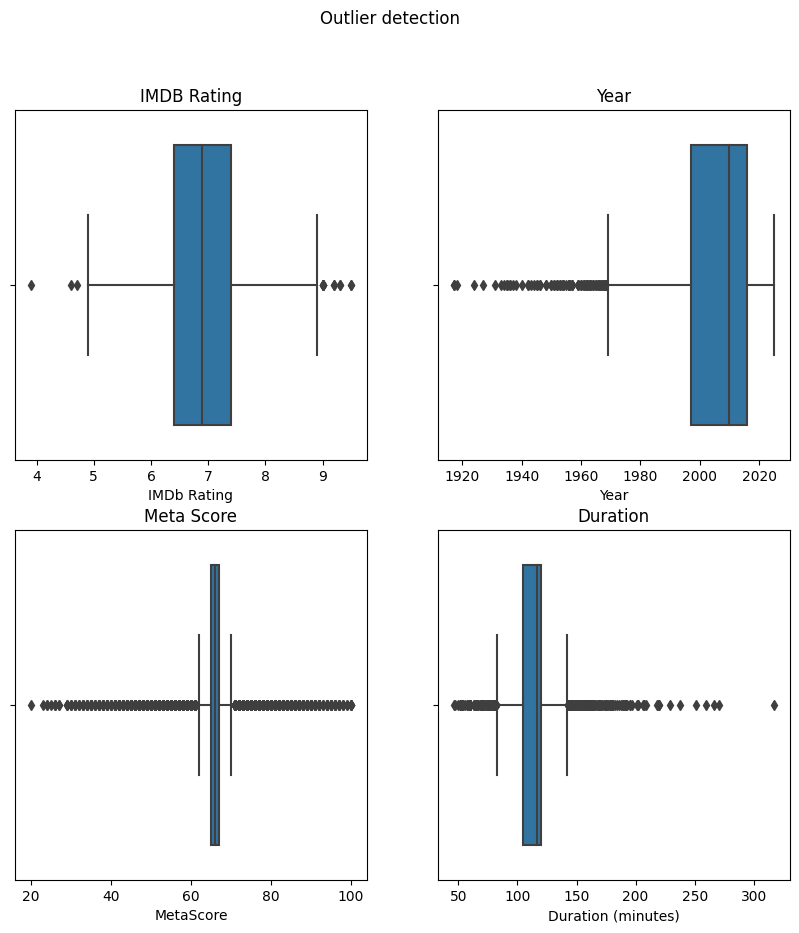

In [24]:
fig, axes= plt.subplots(2, 2, figsize= (10, 10))

sns.boxplot(data= df, x= 'IMDb Rating', ax= axes[0, 0])
axes[0, 0].set_title('IMDB Rating')

sns.boxplot(data= df, x= 'Year', ax= axes[0, 1])
axes[0, 1].set_title('Year')

sns.boxplot(data= df, x= 'MetaScore', ax= axes[1, 0])
axes[1, 0].set_title('Meta Score')

sns.boxplot(data= df, x= 'Duration (minutes)', ax= axes[1, 1])
axes[1, 1].set_title('Duration')

fig.suptitle('Outlier detection')
plt.show()

In [25]:
df= df[df['Year'] > 1930]
df_copy= df_copy[df_copy['Year'] > 1930]

df= df[df['Duration (minutes)'] < 250]
df_copy= df_copy[df_copy['Duration (minutes)'] < 250]

In [26]:
print("The new shape of the dataframe is: ")
df.shape

The new shape of the dataframe is: 


(2752, 6)

DESCRIPTIVE ANALYSIS

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IMDb Rating,2752.0,6.898256,0.808985,3.9,6.4,6.9,7.4,9.5
Year,2752.0,2004.631177,16.558661,1931.0,1997.0,2010.0,2016.0,2025.0
Certificates,2752.0,6.828852,1.788569,0.0,6.0,8.0,8.0,15.0
Genre,2752.0,4.559593,4.235705,0.0,2.0,3.0,7.0,16.0
MetaScore,2752.0,65.749637,10.880877,20.0,65.0,66.0,67.0,100.0
Duration (minutes),2752.0,114.953234,20.102984,46.0,105.0,116.3,120.0,238.0


DATA VISUALIZATION - 2

c:\Users\manan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


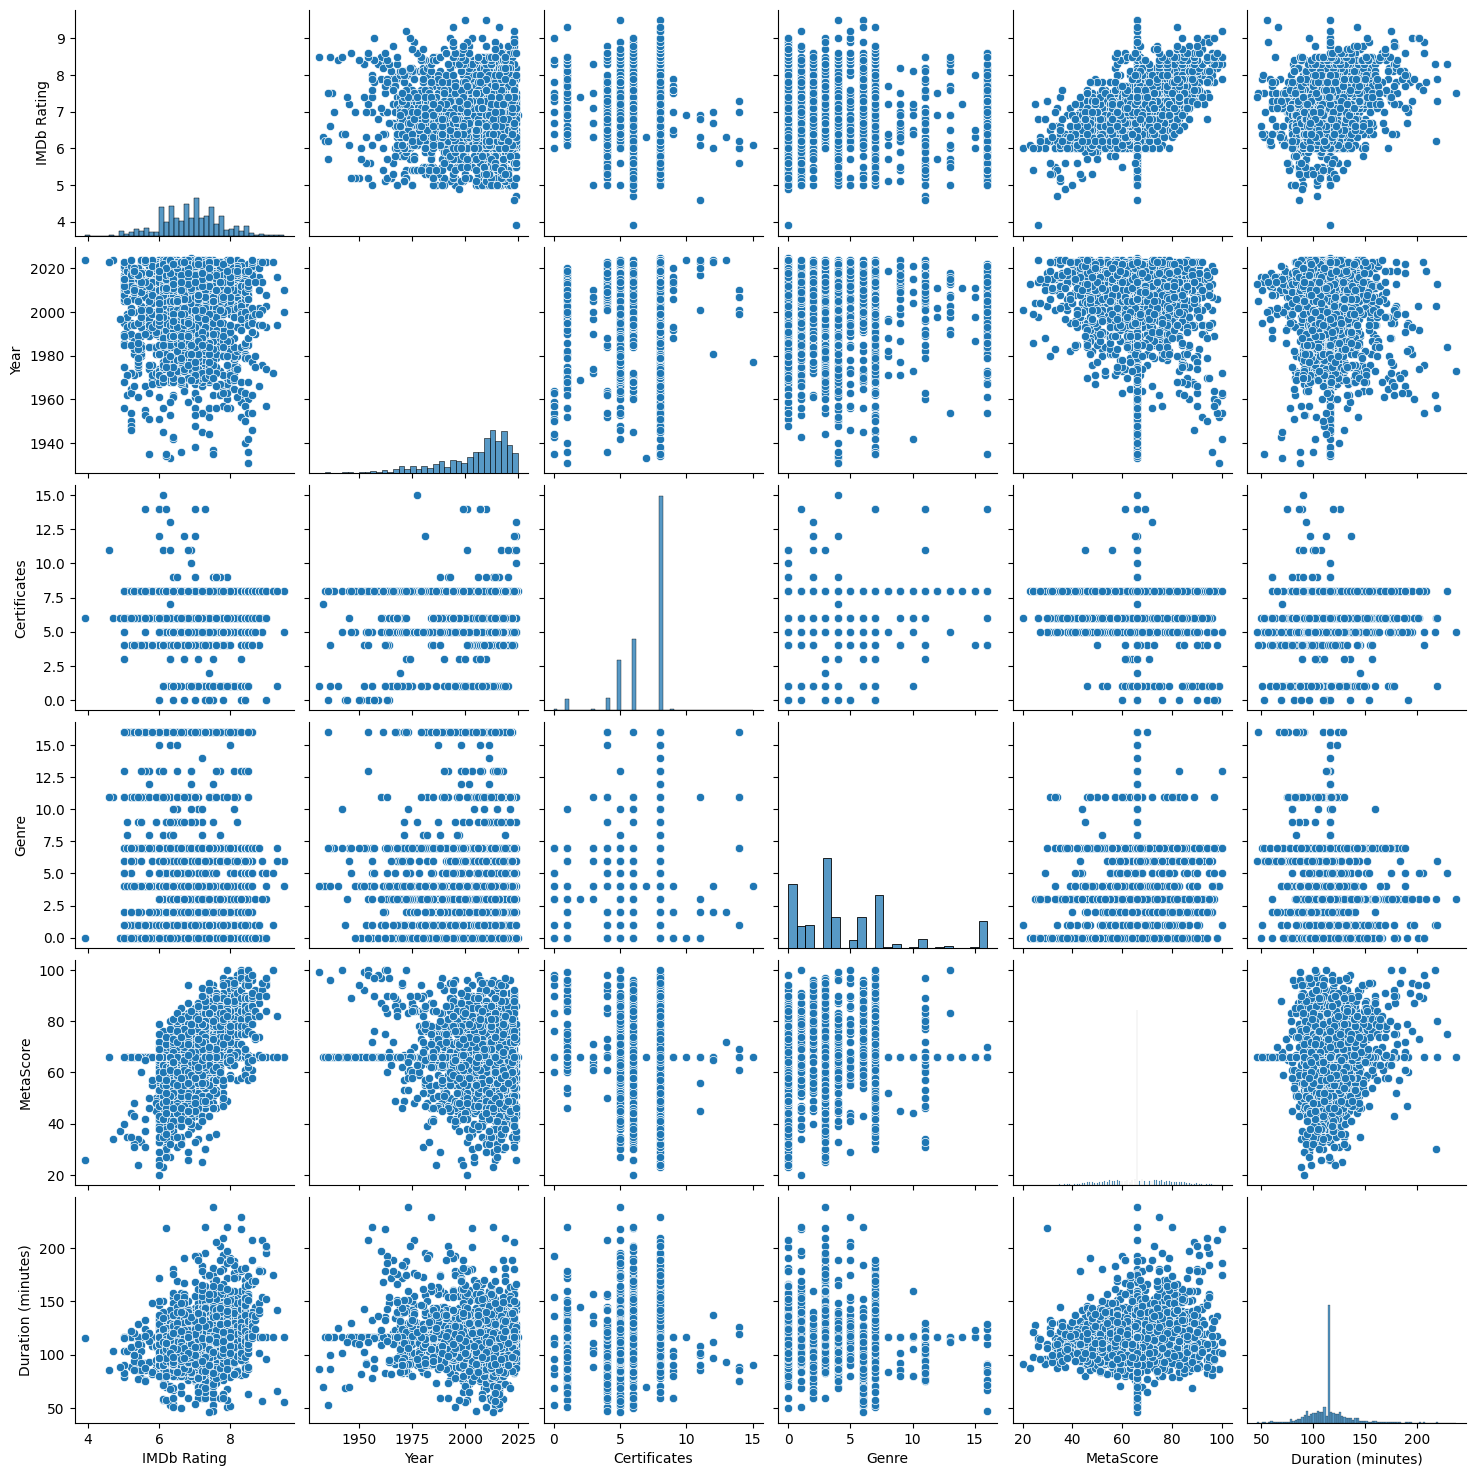

In [28]:
sns.pairplot(df)

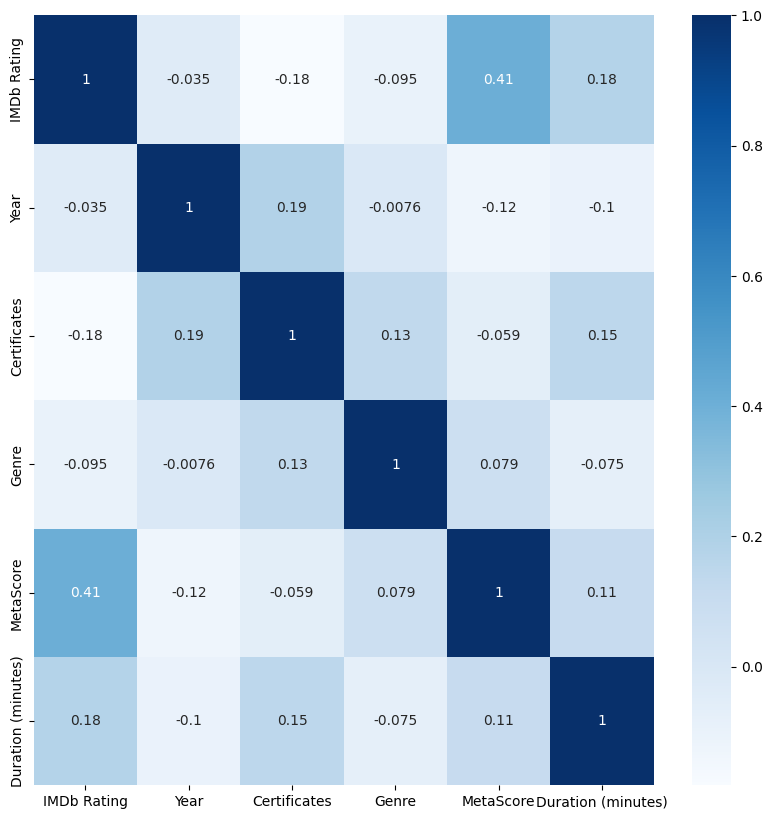

In [29]:
plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), cmap= 'Blues', annot= True)
plt.show()

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_copy['Title'] = df_copy['Title'].str.lower()

cosine_sim = cosine_similarity(df_scaled, df_scaled)

def get_similar_movies(movie_name, cosine_sim= cosine_sim, df=df, df_copy=df_copy, top_n=10):
    df_copy['Title_lower'] = df_copy['Title'].str.lower()
    movie_name_lower = movie_name.lower()
    
    if movie_name_lower not in df_copy['Title_lower'].values:
        return f"Movie '{movie_name}' not found in the dataset."

    df_copy.reset_index(drop=True, inplace=True)
    
    movie_index = df_copy[df_copy['Title_lower'] == movie_name_lower].index[0]
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1] 
    
    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    
    similar_movies = df_copy.loc[movie_indices].copy()
    similar_movies['similarity'] = similarity_scores
    similar_movies = similar_movies.drop(columns=['Title_lower'])
    return similar_movies

movie_name = input("Enter the movie name: ")

similar_movies_df = get_similar_movies(movie_name)

pd.DataFrame(similar_movies_df)


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes),similarity
2709,apocalypse now,8.4,1979,R,Drama,Francis Ford Coppola,John MiliusFrancis Ford CoppolaMichael Herr,94.0,https://m.media-amazon.com/images/M/MV5BYmQyNT...,147.0,0.976451
2746,pulp fiction,8.9,1994,R,Crime,Quentin Tarantino,Quentin TarantinoRoger Avary,95.0,https://m.media-amazon.com/images/M/MV5BNGNhMD...,154.0,0.970859
739,goodfellas,8.7,1990,R,Biography,Martin Scorsese,Nicholas PileggiMartin Scorsese,92.0,https://m.media-amazon.com/images/M/MV5BY2NkZj...,145.0,0.969035
2742,"the good, the bad and the ugly",8.8,1966,R,Adventure,Sergio Leone,Luciano VincenzoniSergio LeoneAgenore Incrocci,90.0,https://m.media-amazon.com/images/M/MV5BNjJlYm...,178.0,0.965993
2436,woodstock,8.1,1970,R,Documentary,Michael Wadleigh,Joan BaezRichie HavensRoger Daltrey,95.0,https://m.media-amazon.com/images/M/MV5BMzJkZT...,184.0,0.963202
2747,the godfather part ii,9.0,1974,R,Crime,Francis Ford Coppola,Francis Ford CoppolaMario Puzo,90.0,https://m.media-amazon.com/images/M/MV5BMWMwMG...,202.0,0.959515
2735,saving private ryan,8.6,1998,R,Drama,Steven Spielberg,Tom HanksMatt DamonTom Sizemore,91.0,https://m.media-amazon.com/images/M/MV5BZjhkMD...,169.0,0.953920
567,in the name of the father,8.1,1993,R,Biography,Jim Sheridan,Daniel Day-LewisPete PostlethwaiteAlison Crosbie,84.0,https://m.media-amazon.com/images/M/MV5BMmYyOT...,133.0,0.951999
740,schindler's list,9.0,1993,R,Biography,Steven Spielberg,Liam NeesonRalph FiennesBen Kingsley,95.0,https://m.media-amazon.com/images/M/MV5BNDE4OT...,195.0,0.950233
606,the killing fields,7.8,1984,R,Biography,Roland Joffé,Sam WaterstonHaing S. NgorJohn Malkovich,76.0,https://m.media-amazon.com/images/M/MV5BZTMxYj...,141.0,0.944540


In [33]:
for i in df_copy['Title'].unique():
    print(i)

end of the spear
elvira madigan
the kid stays in the picture
it ain't over
mahler
the dark horse
stephen curry: underrated
carrington
burden
georgetown
miles ahead
the king of kong: a fistful of quarters
the devil's violinist
a tale of love and darkness
cobb
godard mon amour
muscle shoals
it's all gone pete tong
chuck
macarthur
married life
the wild child
lonesome soldier
princess kaiulani
blaze
my father's glory
13 minutes
salome's last dance
the wonderful world of the brothers grimm
a quiet passion
burning blue
ludwig
the man who invented christmas
music within
mcqueen
danton
nightwatching
desert flower
inside deep throat
the lady
impromptu
percy vs goliath
casino jack
born to be blue
tom horn
mary, queen of scots
freeheld
same kind of different as me
one chance
20 feet from stardom
yves saint laurent
the white crow
bound for glory
lucie aubrac
woodlawn
patty hearst
the look of silence
mesrine: public enemy no. 1
walker
the sparks brothers
lady sings the blues
val
marley
prick up you

In [34]:
import joblib
joblib.dump(df, 'df.pkl')
joblib.dump(df_copy, 'df_copy.pkl')

['df_copy.pkl']